<a href="https://colab.research.google.com/github/vneumannufprbr/Computer-Vision/blob/main/PlanoMSB7y6LenaGris256.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-983878802.py:42: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  msb_image_pil = Image.fromarray(msb_image_np, mode='L') # Crear como imagen en escala de grises


Imagen del plano de bits MSB guardada exitosamente como 'lena_msb_plane_1bit.tif' en formato TIFF (1-bit)


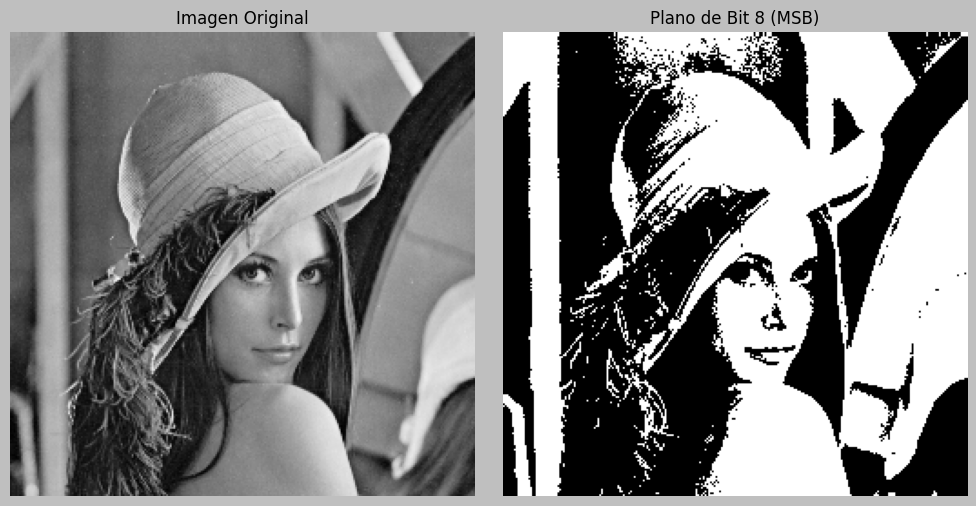

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO

def load_image_from_github_url(url):
    """Carga una imagen desde una URL de GitHub y la convierte a escala de grises."""
    try:
        raw_url = url.replace("github.com", "raw.githubusercontent.com").replace("/blob/", "/")
        response = requests.get(raw_url)
        response.raise_for_status()
        img = Image.open(BytesIO(response.content)).convert('L')
        return np.array(img)
    except requests.exceptions.RequestException as e:
        print(f"Error al descargar la imagen: {e}")
        return None

# --- Configuración ---
image_url = 'https://github.com/vneumannufprbr/Computer-Vision/blob/main/lena_gray_256.tif'

# --- Procesamiento ---
original_image_np = load_image_from_github_url(image_url)

if original_image_np is not None:
    image_tensor = tf.constant(original_image_np, dtype=tf.uint8)

    # Aislar solo el Bit 8 (MSB), que es el bit en la posición 7
    bit = 7
    mask = 2**bit  # Máscara = 128

    # Aplicar AND bit a bit y convertir a imagen visible
    bit_plane_raw = tf.bitwise.bitwise_and(image_tensor, mask)
    bit_plane_visible = tf.where(bit_plane_raw > 0, 255, 0)

    # --- (NUEVO) Guardar la imagen del plano de bits MSB ---
    try:
        # Convertir el tensor de TensorFlow a un array de NumPy
        msb_image_np = bit_plane_visible.numpy().astype(np.uint8) # Asegurarse de que sea uint8
        # Crear un objeto de imagen a partir del array
        msb_image_pil = Image.fromarray(msb_image_np, mode='L') # Crear como imagen en escala de grises

        # Convertir a modo '1' (1-bit pixels, black and white)
        msb_image_pil = msb_image_pil.convert('1')

        # Guardar la imagen en un archivo en formato TIFF
        file_name = 'lena_msb_plane_1bit.tif'
        msb_image_pil.save(file_name, format='TIFF')
        print(f"Imagen del plano de bits MSB guardada exitosamente como '{file_name}' en formato TIFF (1-bit)")
    except Exception as e:
        print(f"Ocurrió un error al guardar la imagen: {e}")
    # ---------------------------------------------------------

    # --- Visualización Comparativa ---
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    plt.style.use('grayscale')

    axes[0].imshow(image_tensor.numpy(), cmap='gray') # Especificar cmap para escala de grises
    axes[0].set_title('Imagen Original')
    axes[0].axis('off')

    axes[1].imshow(bit_plane_visible.numpy(), cmap='gray') # Especificar cmap para escala de grises
    axes[1].set_title('Plano de Bit 8 (MSB)')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

/tmp/ipython-input-152287443.py:45: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  msb_image_pil = Image.fromarray(msb_image_np, mode='L') # Crear como imagen en escala de grises


Imagen del plano de bits (bit 6) guardada exitosamente como 'lena_bit_plane_6_1bit.tif' en formato TIFF (1-bit)


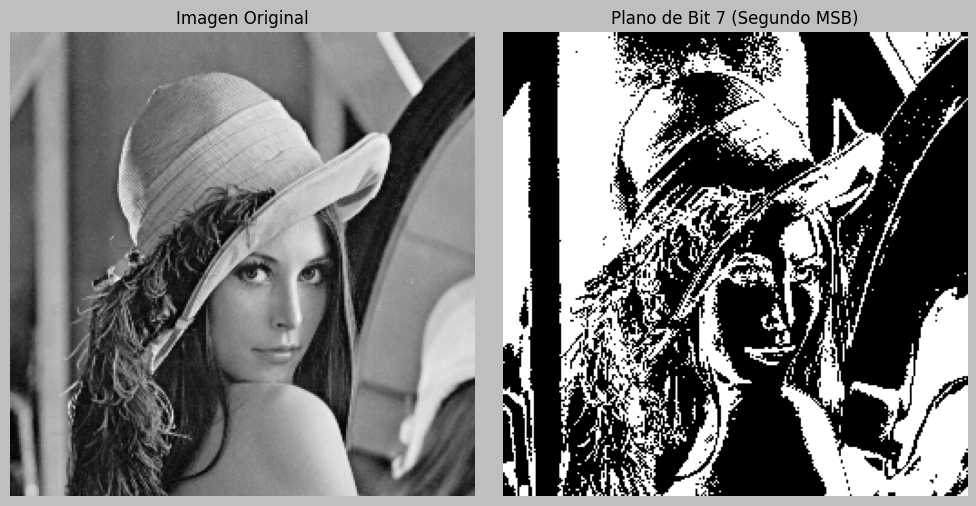

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO

# Reutilizamos la función para cargar la imagen
# def load_image_from_github_url(url):
#     """Carga una imagen desde una URL de GitHub y la convierte a escala de grises."""
#     try:
#         raw_url = url.replace("github.com", "raw.githubusercontent.com").replace("/blob/", "/")
#         response = requests.get(raw_url)
#         response.raise_for_status()
#         img = Image.open(BytesIO(response.content)).convert('L')
#         return np.array(img)
#     except requests.exceptions.RequestException as e:
#         print(f"Error al descargar la imagen: {e}")
#         return None

# --- Configuración ---
image_url = 'https://github.com/vneumannufprbr/Computer-Vision/blob/main/lena_gray_256.tif'

# --- Procesamiento ---
# Reutilizamos la imagen original cargada previamente si está disponible
if 'original_image_np' not in locals() or original_image_np is None:
    original_image_np = load_image_from_github_url(image_url)

if original_image_np is not None:
    image_tensor = tf.constant(original_image_np, dtype=tf.uint8)

    # Aislar solo el Bit 7, que es el segundo bit más significativo (índice 6)
    bit = 6
    mask = 2**bit  # Máscara = 64

    # Aplicar AND bit a bit y convertir a imagen visible
    bit_plane_raw = tf.bitwise.bitwise_and(image_tensor, mask)
    bit_plane_visible = tf.where(bit_plane_raw > 0, 255, 0)

    # --- Guardar la imagen del plano de bits ---
    try:
        # Convertir el tensor de TensorFlow a un array de NumPy
        msb_image_np = bit_plane_visible.numpy().astype(np.uint8) # Asegurarse de que sea uint8
        # Crear un objeto de imagen a partir del array
        msb_image_pil = Image.fromarray(msb_image_np, mode='L') # Crear como imagen en escala de grises

        # Convertir a modo '1' (1-bit pixels, black and white)
        msb_image_pil = msb_image_pil.convert('1')

        # Guardar la imagen en un archivo en formato TIFF
        file_name = 'lena_bit_plane_6_1bit.tif'
        msb_image_pil.save(file_name, format='TIFF')
        print(f"Imagen del plano de bits (bit 6) guardada exitosamente como '{file_name}' en formato TIFF (1-bit)")
    except Exception as e:
        print(f"Ocurrió un error al guardar la imagen: {e}")
    # ---------------------------------------------------------

    # --- Visualización ---
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    plt.style.use('grayscale')

    axes[0].imshow(image_tensor.numpy(), cmap='gray') # Especificar cmap para escala de grises
    axes[0].set_title('Imagen Original')
    axes[0].axis('off')

    axes[1].imshow(bit_plane_visible.numpy(), cmap='gray') # Especificar cmap para escala de grises
    axes[1].set_title('Plano de Bit 7 (Segundo MSB)')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()